In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

# Explicitly enable IterativeImputer (fix for the error)
from sklearn.experimental import enable_iterative_imputer  # Add this line
from sklearn.impute import IterativeImputer

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress iteration warnings for logistic regression convergence
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Load the filtered datasets for PC, PS4, and Xbox
filtered_pc_legend_stats_df = pd.read_csv(r"C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Stats Per Legend\Filtered Datasets\Legend_Stats_PC_Filtered.csv")
filtered_ps4_legend_stats_df = pd.read_csv(r"C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Stats Per Legend\Filtered Datasets\Legend_Stats_PS4_Filtered.csv")
filtered_xbox_legend_stats_df = pd.read_csv(r"C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Stats Per Legend\Filtered Datasets\Legend_Stats_Xbox_Filtered.csv")

# List of datasets and their save paths
datasets = {
    "PC": {
        "data": filtered_pc_legend_stats_df,
        "save_path": r'C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Stats Per Legend\Data Imputation\Imputated Datasets\PC'
    },
    "PS4": {
        "data": filtered_ps4_legend_stats_df,
        "save_path": r'C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Stats Per Legend\Data Imputation\Imputated Datasets\PS'
    },
    "Xbox": {
        "data": filtered_xbox_legend_stats_df,
        "save_path": r'C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Stats Per Legend\Data Imputation\Imputated Datasets\Xbox'
    }
}

# Function to perform imputation
def perform_imputation(df, dataset_name, save_path):
    print(f"Starting imputation processes for {dataset_name} dataset...")

    # Replace zeros with NaN for BR Kills, BR Damage, and BR Wins to treat them as missing values
    df[['BR Kills', 'BR Damage', 'BR Wins']] = df[['BR Kills', 'BR Damage', 'BR Wins']].replace(0, np.nan)

    # Separate player names (or other non-numeric columns) and numeric data for imputation
    player_names = df['player_name']
    numeric_df = df.select_dtypes(include=[np.number])

    # Mode Imputation
    print(f"Performing Mode Imputation for {dataset_name}...")
    mode_imputer = SimpleImputer(strategy="most_frequent")
    df_mode_imputed = pd.DataFrame(mode_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    df_mode_imputed.insert(0, 'player_name', player_names)
    df_mode_imputed.to_csv(f"{save_path}\\{dataset_name}_Legend_Stats_mode_imputed.csv", index=False)

    # Logistic Regression Imputation
    print(f"Performing Logistic Regression Imputation for {dataset_name}...")
    lr_imputer = IterativeImputer(estimator=LogisticRegression(solver='lbfgs', tol=1e-4, max_iter=5), random_state=42)
    df_lr_imputed = pd.DataFrame(lr_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    df_lr_imputed.insert(0, 'player_name', player_names)
    df_lr_imputed.to_csv(f"{save_path}\\{dataset_name}_Legend_Stats_lr_imputed.csv", index=False)

    # # Random Forest Imputation
    # print(f"Performing Random Forest Imputation for {dataset_name}...")
    # rf_imputer = IterativeImputer(estimator=RandomForestClassifier(n_estimators=5), random_state=42, max_iter=10)
    # df_rf_imputed = pd.DataFrame(rf_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    # df_rf_imputed.insert(0, 'player_name', player_names)
    # df_rf_imputed.to_csv(f"{save_path}\\{dataset_name}_Legend_Stats_rf_imputed.csv", index=False)

    # KNN Imputation
    print(f"Performing KNN Imputation for {dataset_name}...")
    knn_imputer = KNNImputer(n_neighbors=5)
    df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    df_knn_imputed.insert(0, 'player_name', player_names)
    df_knn_imputed.to_csv(f"{save_path}\\{dataset_name}_Legend_Stats_knn_imputed.csv", index=False)

    # Mean Imputation
    print(f"Performing Mean Imputation for {dataset_name}...")
    mean_imputer = SimpleImputer(strategy='mean')
    df_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    df_mean_imputed.insert(0, 'player_name', player_names)
    df_mean_imputed.to_csv(f"{save_path}\\{dataset_name}_Legend_Stats_mean_imputed.csv", index=False)

    # Median Imputation
    print(f"Performing Median Imputation for {dataset_name}...")
    median_imputer = SimpleImputer(strategy='median')
    df_median_imputed = pd.DataFrame(median_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    df_median_imputed.insert(0, 'player_name', player_names)
    df_median_imputed.to_csv(f"{save_path}\\{dataset_name}_Legend_Stats_median_imputed.csv", index=False)

    # XGBoost Imputation
    print(f"Performing XGBoost Imputation for {dataset_name}...")
    xgb_imputer = IterativeImputer(estimator=XGBRegressor(), random_state=42, max_iter=10)
    df_xgb_imputed = pd.DataFrame(xgb_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    df_xgb_imputed.insert(0, 'player_name', player_names)
    df_xgb_imputed.to_csv(f"{save_path}\\{dataset_name}_Legend_Stats_xgb_imputed.csv", index=False)

    # MICE Imputation
    print(f"Performing MICE Imputation for {dataset_name}...")
    mice_imputer = IterativeImputer(max_iter=10, random_state=42)
    df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    df_mice_imputed.insert(0, 'player_name', player_names)
    df_mice_imputed.to_csv(f"{save_path}\\{dataset_name}_Legend_Stats_mice_imputed.csv", index=False)

    print(f"Imputation completed and files saved for {dataset_name} dataset.")

# Perform imputation for each dataset (PC, PS4, Xbox)
for dataset_name, dataset_info in datasets.items():
    perform_imputation(dataset_info['data'], dataset_name, dataset_info['save_path'])


Starting imputation processes for PC dataset...
Performing Mode Imputation for PC...
Performing Logistic Regression Imputation for PC...
Performing KNN Imputation for PC...
Performing Mean Imputation for PC...
Performing Median Imputation for PC...
Performing XGBoost Imputation for PC...
Performing MICE Imputation for PC...
Imputation completed and files saved for PC dataset.
Starting imputation processes for PS4 dataset...
Performing Mode Imputation for PS4...
Performing Logistic Regression Imputation for PS4...
Performing KNN Imputation for PS4...
Performing Mean Imputation for PS4...
Performing Median Imputation for PS4...
Performing XGBoost Imputation for PS4...
Performing MICE Imputation for PS4...
Imputation completed and files saved for PS4 dataset.
Starting imputation processes for Xbox dataset...
Performing Mode Imputation for Xbox...
Performing Logistic Regression Imputation for Xbox...
Performing KNN Imputation for Xbox...
Performing Mean Imputation for Xbox...
Performing Me

Computing correlation matrices for PC dataset...

Correlation matrix for PC using lr Imputation:
           BR Kills  BR Damage   BR Wins
BR Kills   1.000000  -0.050176  0.773290
BR Damage -0.050176   1.000000 -0.096706
BR Wins    0.773290  -0.096706  1.000000

Correlation matrix for PC using knn Imputation:
           BR Kills  BR Damage   BR Wins
BR Kills   1.000000   0.983768  0.948571
BR Damage  0.983768   1.000000  0.945071
BR Wins    0.948571   0.945071  1.000000

Correlation matrix for PC using mean Imputation:
           BR Kills  BR Damage   BR Wins
BR Kills   1.000000   0.883546  0.762102
BR Damage  0.883546   1.000000  0.804434
BR Wins    0.762102   0.804434  1.000000

Correlation matrix for PC using median Imputation:
           BR Kills  BR Damage   BR Wins
BR Kills   1.000000   0.897617  0.776870
BR Damage  0.897617   1.000000  0.805764
BR Wins    0.776870   0.805764  1.000000

Correlation matrix for PC using xgb Imputation:
           BR Kills  BR Damage   BR Wins
BR Kil

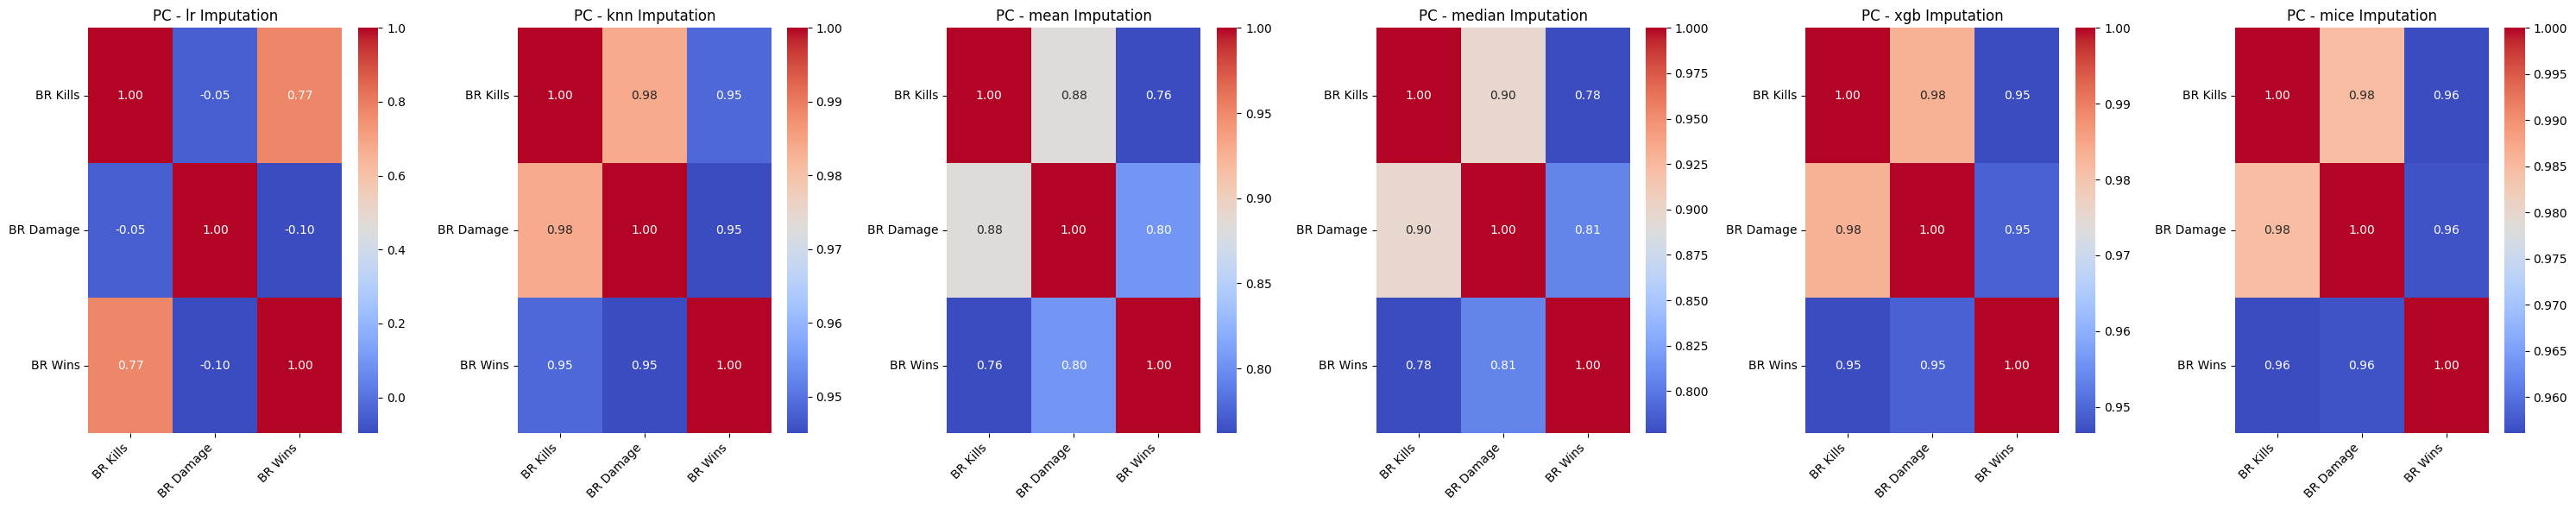

Computing correlation matrices for PS4 dataset...

Correlation matrix for PS4 using lr Imputation:
           BR Kills  BR Damage   BR Wins
BR Kills   1.000000  -0.018504  0.852584
BR Damage -0.018504   1.000000 -0.031969
BR Wins    0.852584  -0.031969  1.000000

Correlation matrix for PS4 using knn Imputation:
           BR Kills  BR Damage   BR Wins
BR Kills   1.000000   0.979395  0.940655
BR Damage  0.979395   1.000000  0.940284
BR Wins    0.940655   0.940284  1.000000

Correlation matrix for PS4 using mean Imputation:
           BR Kills  BR Damage   BR Wins
BR Kills   1.000000   0.928356  0.821506
BR Damage  0.928356   1.000000  0.853419
BR Wins    0.821506   0.853419  1.000000

Correlation matrix for PS4 using median Imputation:
           BR Kills  BR Damage   BR Wins
BR Kills   1.000000   0.954742  0.853680
BR Damage  0.954742   1.000000  0.866488
BR Wins    0.853680   0.866488  1.000000

Correlation matrix for PS4 using xgb Imputation:
           BR Kills  BR Damage   BR Wins


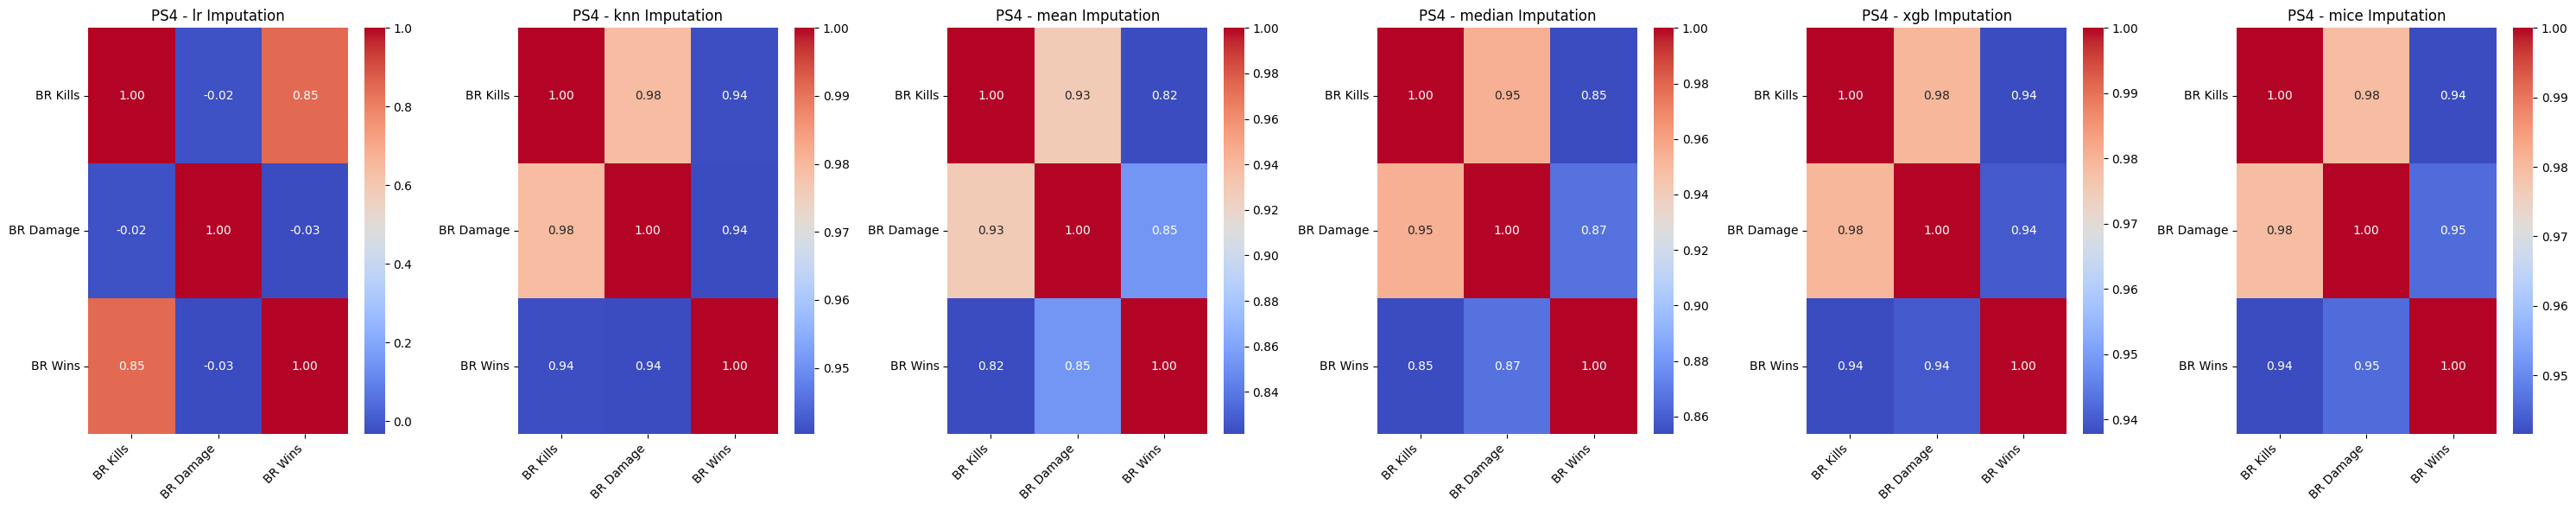

Computing correlation matrices for Xbox dataset...

Correlation matrix for Xbox using lr Imputation:
           BR Kills  BR Damage   BR Wins
BR Kills   1.000000  -0.020449  0.826914
BR Damage -0.020449   1.000000 -0.032510
BR Wins    0.826914  -0.032510  1.000000

Correlation matrix for Xbox using knn Imputation:
           BR Kills  BR Damage   BR Wins
BR Kills   1.000000   0.799067  0.946353
BR Damage  0.799067   1.000000  0.764496
BR Wins    0.946353   0.764496  1.000000

Correlation matrix for Xbox using mean Imputation:
           BR Kills  BR Damage   BR Wins
BR Kills   1.000000   0.753631  0.804971
BR Damage  0.753631   1.000000  0.673062
BR Wins    0.804971   0.673062  1.000000

Correlation matrix for Xbox using median Imputation:
           BR Kills  BR Damage   BR Wins
BR Kills   1.000000   0.777212  0.828775
BR Damage  0.777212   1.000000  0.685620
BR Wins    0.828775   0.685620  1.000000

Correlation matrix for Xbox using xgb Imputation:
           BR Kills  BR Damage   BR

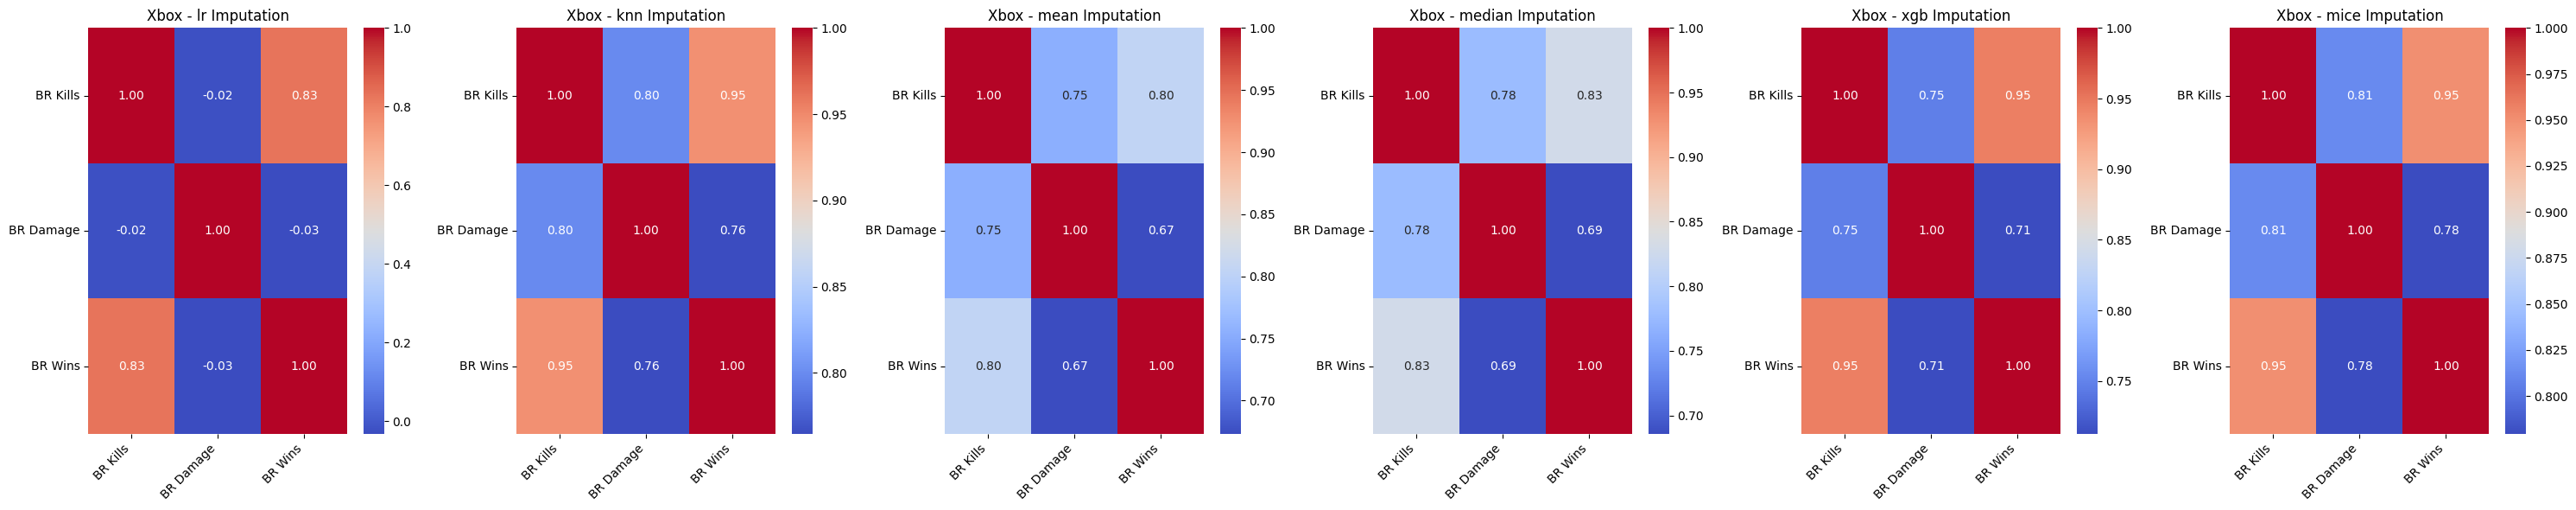

Correlation matrices have been computed and visualized.


In [5]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define paths to the imputed datasets
imputed_dataset_paths = {
    "PC": r'C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Stats Per Legend\Data Imputation\Imputated Datasets\PC',
    "PS4": r'C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Stats Per Legend\Data Imputation\Imputated Datasets\PS',
    "Xbox": r'C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\Data_Retrieval\CSV_files\Stats Per Legend\Data Imputation\Imputated Datasets\Xbox'
}

# Imputation methods
imputation_methods = [
    'Legend_Stats_lr_imputed.csv',
    'Legend_Stats_knn_imputed.csv',
    'Legend_Stats_mean_imputed.csv',
    'Legend_Stats_median_imputed.csv',
    'Legend_Stats_xgb_imputed.csv',
    'Legend_Stats_mice_imputed.csv'
]

# Function to compute correlation matrices for each imputed dataset
def compute_correlation(dataset_name, dataset_path):
    print(f"Computing correlation matrices for {dataset_name} dataset...")
    
    # Dictionary to store the correlation results for this dataset
    dataset_correlations = {}
    
    for method in imputation_methods:
        # Load the imputed dataset
        imputed_file_path = f'{dataset_path}\\{dataset_name}_{method}'
        imputed_df = pd.read_csv(imputed_file_path)

        # Select only numeric columns for correlation
        numeric_df = imputed_df.select_dtypes(include=[np.number])

        # Compute correlation matrix
        correlation_matrix = numeric_df.corr()
        
        # Store the correlation matrix
        dataset_correlations[method] = correlation_matrix

        # Print the correlation matrix for verification
        print(f"\nCorrelation matrix for {dataset_name} using {method.split('_')[2]} Imputation:")
        print(correlation_matrix)
    
    return dataset_correlations

# Function to visualize correlation matrices side by side
def visualize_correlations_side_by_side(correlations, dataset_name):
    num_methods = len(correlations)
    fig, axes = plt.subplots(1, num_methods, figsize=(5 * num_methods, 6))
    
    # Iterate over each imputation method and its correlation matrix
    for ax, (method, correlation_matrix) in zip(axes, correlations.items()):
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, ax=ax)
        ax.set_title(f'{dataset_name} - {method.split("_")[2]} Imputation')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    
    plt.tight_layout()
    plt.show()

# Loop through each dataset (PC, PS4, Xbox) and compute and visualize correlations
for dataset_name, dataset_path in imputed_dataset_paths.items():
    correlations = compute_correlation(dataset_name, dataset_path)
    visualize_correlations_side_by_side(correlations, dataset_name)

print("Correlation matrices have been computed and visualized.")
